In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [95]:
class Planeta:

    def __init__(self, e, a, t):

        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo

        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.G = 4*np.pi**2 # Unidades gaussianas

        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)

        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )

        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        # El valor del pasado
        self.rp = self.r

    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()

        if i==0:
            self.r = self.rp + self.v*self.dt
        else:

            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)

            self.rp = self.r
            self.r = self.rf

    def SetPosition(self,i):
        self.R[i] = self.r

    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetPerihelio(self):

        Dist = np.linalg.norm(self.R,axis=1)

        timeup = []

        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])

        return timeup

In [78]:
def GetPlanetas(t):
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.093,1.524,t)
    Jupiter = Planeta(0.049, 5.20440, t)
    Saturno = Planeta(0.057, 9.5826, t)
    Urano = Planeta(0.046, 19.2184, t)
    Neptuno = Planeta(0.010, 30.11, t)
    return [Mercurio,Venus,Tierra, Marte, Jupiter, Saturno, Urano, Neptuno]

In [123]:
def GetPeriodo(planeta):
    perihelio = np.min(np.linalg.norm(planeta.R, axis=1)) # tuve que hacer esto para el perihelio ya que la funcion del codigo original no arroja resultado correcto del perihelio
    print("perihelio")
    print(perihelio)
    periodo = 2 * np.pi * np.sqrt(perihelio**3 / planeta.G)
    return periodo

In [79]:
dt = 0.001
tmax = 5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [80]:
def RunSimulation(t,Planetas):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared


    return Planetas

In [115]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 5000/5000 [00:00<00:00, 11079.17 Steps/s]


In [100]:
Planetas[1].GetPerihelio()

[0.552,
 1.167,
 1.782,
 2.3970000000000002,
 3.013,
 3.628,
 4.243,
 4.8580000000000005]

In [97]:
scale = 20
t1 = t[::scale]

In [98]:
#plt.plot(Planetas[1].GetPosition()[:,0],Planetas[1].GetPosition()[:,1])

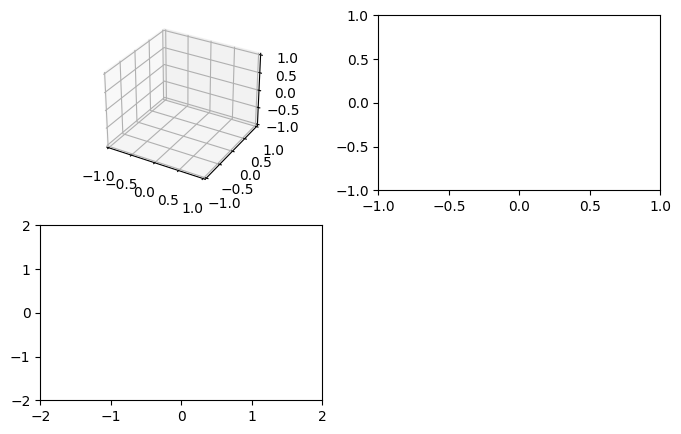

In [99]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():

    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)

    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)

    ax2.clear()
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2)

def Update(i):

    init()

    for j, p in enumerate(Planetas):

        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]

        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]

        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)

        ax.scatter(x,y,z,color=colors[j])

        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)

    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    ax2.scatter(Mx,My,marker='.',label='Mercurio')
    ax2.scatter(Vx,Vy,marker='.',label='Venus')

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [125]:
semi_ejes = np.array([planeta.a_ for planeta in Planetas])
periodos = np.array([GetPeriodo(planeta) for planeta in Planetas])

perihelio
0.3100145351241161
perihelio
0.7135939187769863
perihelio
0.9821341810095852
perihelio
1.3836621031281529
perihelio
5.0737576844694585
perihelio
9.340717915075546
perihelio
18.401153271792484
perihelio
29.814546270143893


In [126]:
# cmporbar la tercera ley de Kepler para cada planeta
for i, planeta in enumerate(Planetas):
    periodo_cuadrado = periodos[i]**2
    semi_eje_cubo = semi_ejes[i]**3
    proporcionalidad = periodo_cuadrado / semi_eje_cubo
    print(periodo_cuadrado)
    print(f"Planeta {i+1}: Proporcionalidad = {proporcionalidad}")

0.02979519067276669
Planeta 1: Proporcionalidad = 0.5140593632672642
0.36337364140353157
Planeta 2: Proporcionalidad = 0.9602803138417287
0.9473544029474622
Planeta 3: Proporcionalidad = 0.9473544029474622
2.6490498982414152
Planeta 4: Proporcionalidad = 0.7484025142799107
130.61383053174518
Planeta 5: Proporcionalidad = 0.9265677106190752
814.9684016990282
Planeta 6: Proporcionalidad = 0.926169958985278
6230.6754285137
Planeta 7: Proporcionalidad = 0.8777754770229138
26502.363928795032
Planeta 8: Proporcionalidad = 0.9708504736940763


In [107]:
def linear_regression(x, y):
    n = len(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    xy_mean = np.mean(x * y)
    xx_mean = np.mean(x**2)

    slope = (xy_mean - mean_x * mean_y) / (xx_mean - mean_x**2)
    intercept = mean_y - slope * mean_x

    return slope, intercept

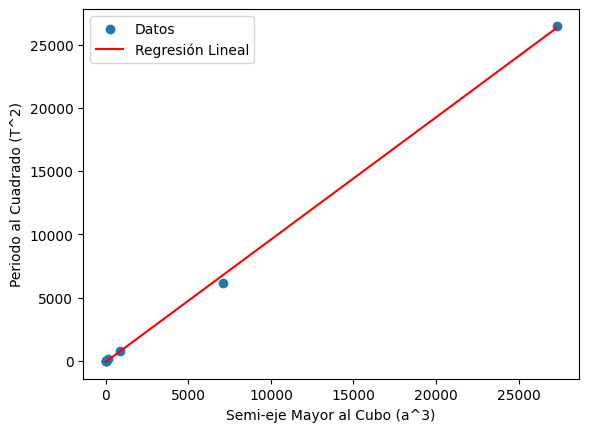

In [108]:
plt.scatter(semi_ejes**3, periodos**2, label='Datos')
slope, intercept = linear_regression(semi_ejes**3, periodos**2)
fit_line = slope * semi_ejes**3 + intercept
plt.plot(semi_ejes**3, fit_line, color='red', label='Regresión Lineal')
plt.xlabel('Semi-eje Mayor al Cubo (a^3)')
plt.ylabel('Periodo al Cuadrado (T^2)')
plt.legend()
plt.show()

In [111]:

print(f'Pendiente de la regresión lineal: {slope}')

masa_sol_gauss = slope / (4 * np.pi**2)
masa_sol_si = masa_sol_gauss * 1.32712440018e20
print(f'Masa del Sol en unidades gaussianas: {masa_sol_gauss} U.G.')
print(f'Masa del Sol en unidades SI: {masa_sol_si} kg')

Pendiente de la regresión lineal: 0.968027276987485
Masa del Sol en unidades gaussianas: 0.02452041737561029 U.G.
Masa del Sol en unidades SI: 3.2541644201770056e+18 kg
